In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# IMPORTING REQUIRED LIBRARIES & DATASET

In [2]:
import time as tp
t0 = tp.time()
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from DI_DeepInsights import * 

import seaborn as sns


In [3]:
# Read data
#df_new
df_new.shape

(40606, 112)

In [4]:
# Defining the target & usable variables
Y = 'TARGET'
COL_NAMES_START = [ i for i in df_new.columns if i not in ["CHF_category", "APPROX_AGE_CAT" , "APPROX_AGE_GEN_CAT", "ind","train_valid_test","PERFED_DATE","PERFED_YYYY_MM","PATIENT_GENDER", "PERFED_DT", "PATIENT_BIRTH_YEAR", "LVEF_CATEGORY", "PATIENT_ID_SYNTH", "VALUE_GENERATED", "TARGET","CHF_4YR_FLAG"]]
# "CHF_PRE_2YR_FLAG"
len(COL_NAMES_START)

101

In [5]:
#COLS_NAMES = COL_NAMES_START_100
COLS_NAMES = COL_NAMES_START
X_train = df_new[df_new.train_valid_test == 'train'][COLS_NAMES]
y_train = df_new[df_new.train_valid_test == 'train'][Y]

X_valid = df_new[df_new.train_valid_test == 'valid'][COLS_NAMES]
y_valid = df_new[df_new.train_valid_test == 'valid'][Y]

X_test = df_new[df_new.train_valid_test == 'test'][COLS_NAMES]
y_test = df_new[df_new.train_valid_test == 'test'][Y]

X_train.shape , y_train.shape , X_valid.shape , y_valid.shape , X_test.shape , y_test.shape

((32410, 101), (32410,), (4006, 101), (4006,), (4190, 101), (4190,))

In [6]:
print ("--------------------" , np.round ( (tp.time() - t0) / 60,2 ) ," minutes passed   --------------------" )

-------------------- 0.11  minutes passed   --------------------


# DeepInsight Implementation

In [7]:
ln = LogScaler()
X_train_norm = ln.fit_transform(X_train)
X_valid_norm = ln.transform(X_valid)
X_test_norm = ln.transform(X_test)

In [8]:
np.count_nonzero(np.isnan(X_train_norm))

0

In [9]:
t0 = tp.time()

/dataiku_data/data/code-envs/python/PRIMAPE_1_Py_37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


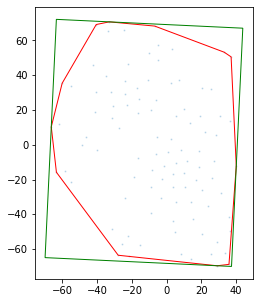

In [10]:
image_trans = ImageTransformer(feature_extractor=  "tSNE" , #svd ,  # 'kpca', 'tSNE', 'pca' 
                      pixels=224, random_state= 27)
plt.figure(figsize=(5, 5))
image_trans.fit(X_train_norm , plot=True)

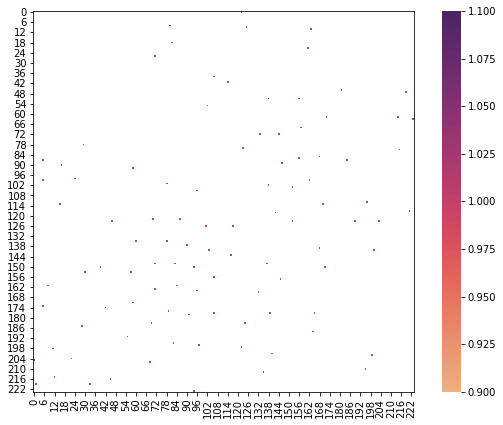

In [11]:
fdm = image_trans.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="flare", linewidths=0.001, 
                 linecolor="lightgrey", square=True)
for _, spine in ax.spines.items():
    spine.set_visible(True)

/dataiku_data/data/code-envs/python/PRIMAPE_1_Py_37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


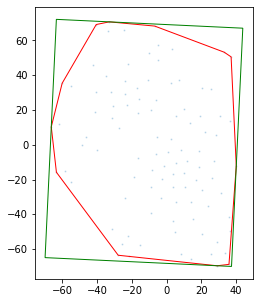

In [12]:
image_trans = ImageTransformer(feature_extractor=  "tSNE" , #svd ,  # 'kpca', 'tSNE', 'pca' 
                      pixels=32, random_state= 27)
plt.figure(figsize=(5, 5))
image_trans.fit(X_train_norm , plot=True)

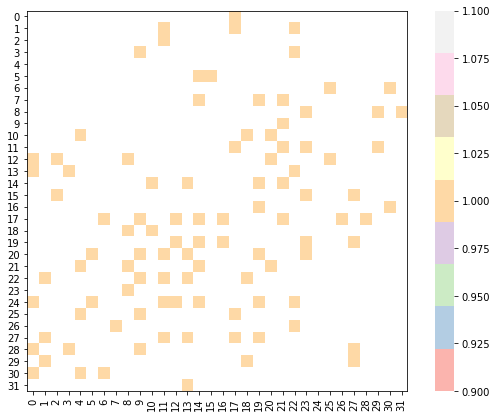

In [13]:
fdm = image_trans.feature_density_matrix()
fdm[fdm == 0] = np.nan

plt.figure(figsize=(10, 7))

ax = sns.heatmap(fdm, cmap="Pastel1", linewidths=0.001, 
                 linecolor="lightgrey", square=True)
for _, spine in ax.spines.items():
    spine.set_visible(True)

In [14]:
mat_train = image_trans.transform(X_train ) 
mat_valid = image_trans.transform(X_valid )
mat_test = image_trans.transform(X_test )

In [15]:
def plot_few ( dat, target, k =  4 , clas =  0 ):
    fig, ax = plt.subplots(1, k, figsize=(25, 7))
    class_dat = dat [ target == clas]
    for i in range(10, 10+k):
        mat_this =  class_dat[i][:,:,1]
        mat_this[mat_this == 0] = np.nan
        cax = sns.heatmap(mat_this, center = 0 ,  cmap= 'flare' , 
                      linewidth=0.005  ,   linecolor='lightgrey',
                      square=True, ax=ax[i-10]  , cbar=False)
        cax.axis('off')
    plt.tight_layout()

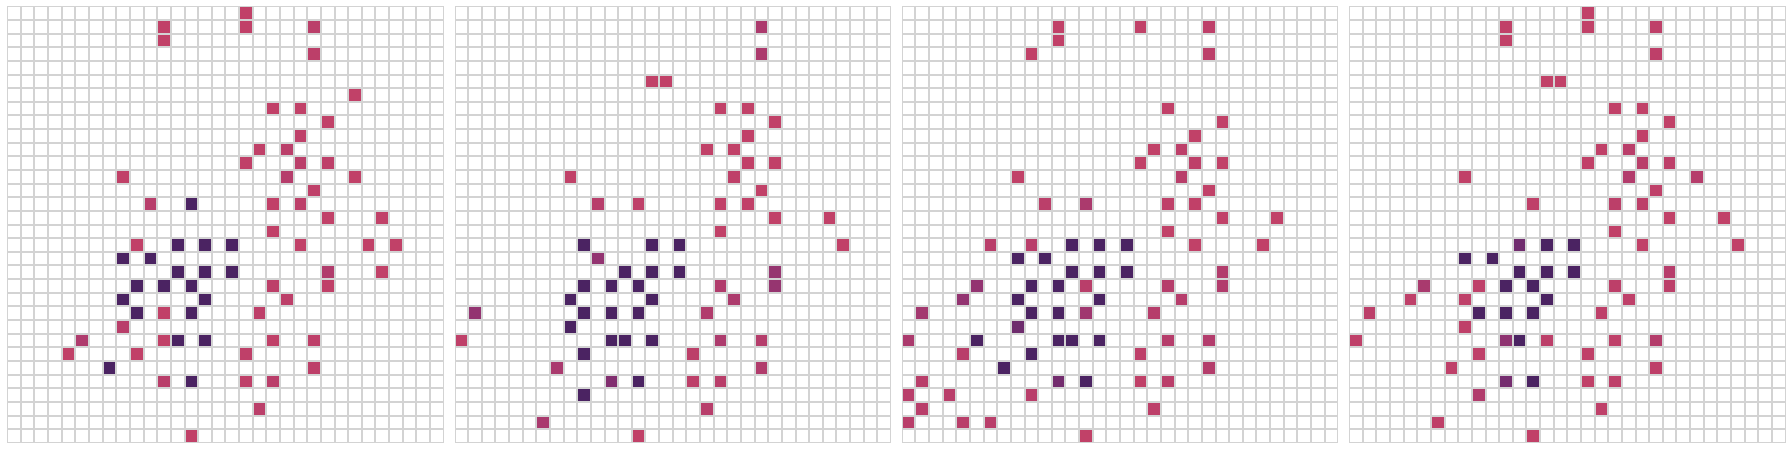

In [16]:
plot_few ( mat_train, y_train, 4 , 0)

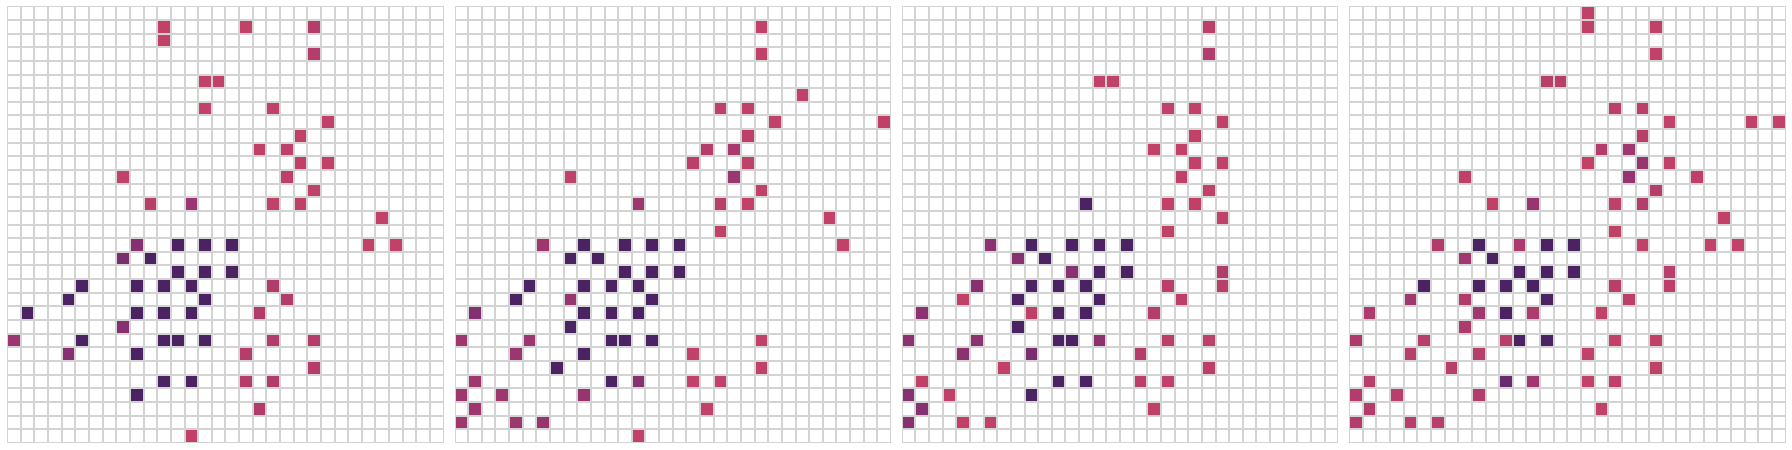

In [17]:
plot_few ( mat_train, y_train, 4 , 1)

In [18]:
print ("--------------------" , np.round ( (tp.time() - t0) / 60,2 ) ," minutes passed   --------------------" )

-------------------- 1.64  minutes passed   --------------------
